In [95]:
import pandas as pd 

df = pd.read_csv('data.csv')

In [96]:
df.head(10)

,transaction_id,date,client_id,montant,type,mode_paiement,statut,region
0,1001,2025-01-01,C007,869,transfert,virement,validé,Sud
1,1002,2025-01-02,C020,1486,retrait,chèque,validé,Ouest
2,1003,2025-01-03,C015,-354,dépôt,carte,validé,Sud
3,1004,2025-01-04,C011,2719,transfert,chèque,validé,Sud
4,1005,2025-01-05,C008,2411,retrait,virement,validé,Ouest
5,1006,2025-01-06,C007,1234,transfert,espèces,validé,Est
6,1007,2025-01-07,C019,1343,dépôt,virement,validé,Est
7,1008,2025-01-08,C011,-12,dépôt,virement,validé,Sud
8,1009,2025-01-09,C011,2476,dépôt,virement,validé,Sud
9,1010,2025-01-10,C004,1459,transfert,espèces,annulé,Est


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  200 non-null    int64 
 1   date            200 non-null    object
 2   client_id       200 non-null    object
 3   montant         200 non-null    int64 
 4   type            200 non-null    object
 5   mode_paiement   200 non-null    object
 6   statut          200 non-null    object
 7   region          200 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.6+ KB


In [98]:
df['montant'].describe()

count     200.000000
mean     1793.820000
std      1274.291597
min      -496.000000
25%       653.000000
50%      1876.500000
75%      2753.500000
max      3999.000000
Name: montant, dtype: float64

In [99]:
df.isnull().sum()

transaction_id    0
date              0
client_id         0
montant           0
type              0
mode_paiement     0
statut            0
region            0
dtype: int64

In [100]:
df["type"].value_counts()

type
dépôt        83
transfert    63
retrait      54
Name: count, dtype: int64

In [101]:
df["statut"].value_counts()

statut
validé    179
annulé     21
Name: count, dtype: int64

In [102]:
df["region"].value_counts()

region
Est      54
Nord     52
Sud      50
Ouest    44
Name: count, dtype: int64

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
# import numpy as np

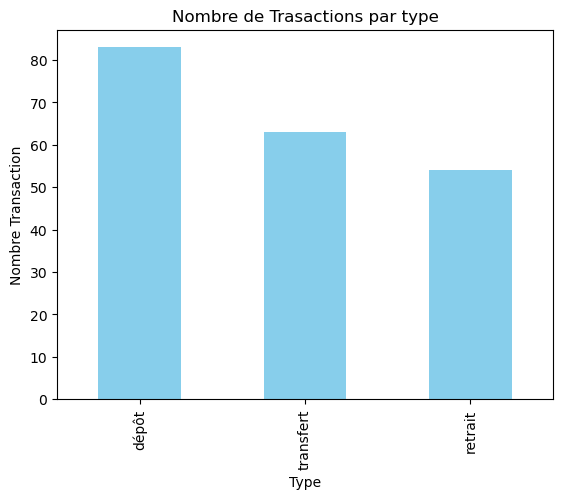

In [104]:
df["type"].value_counts().plot(kind="bar" , color="skyblue" )
plt.title( "Nombre de Trasactions par type")
plt.xlabel("Type")
plt.ylabel("Nombre Transaction")
plt.show()

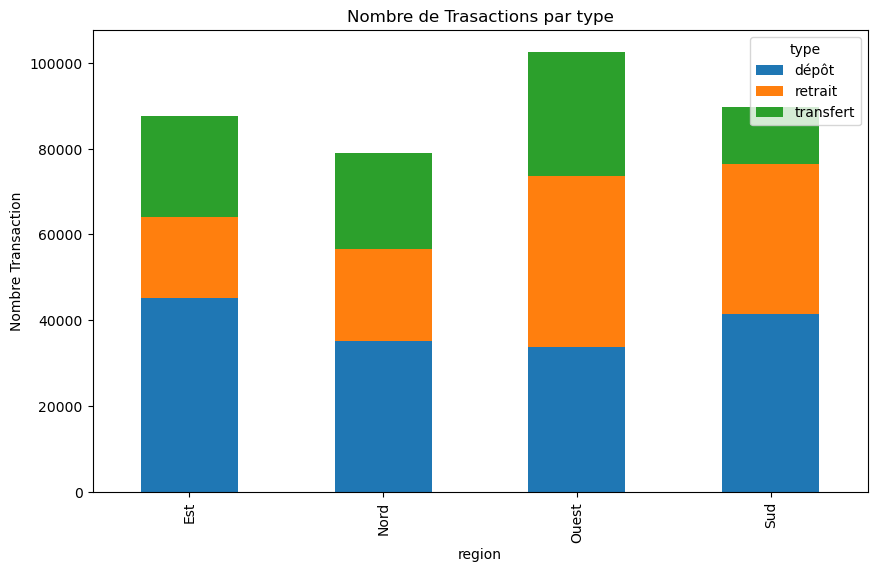

In [105]:
werdani = df.groupby(['region' , 'type'])["montant"].sum().unstack(fill_value=0)
werdani.plot(kind = 'bar' , stacked = True , figsize=(10,6))

plt.title( "Nombre de Trasactions par type")
plt.xlabel("region")
plt.ylabel("Nombre Transaction")
plt.legend(title ="type")
plt.show()

<Axes: xlabel='montant', ylabel='Count'>

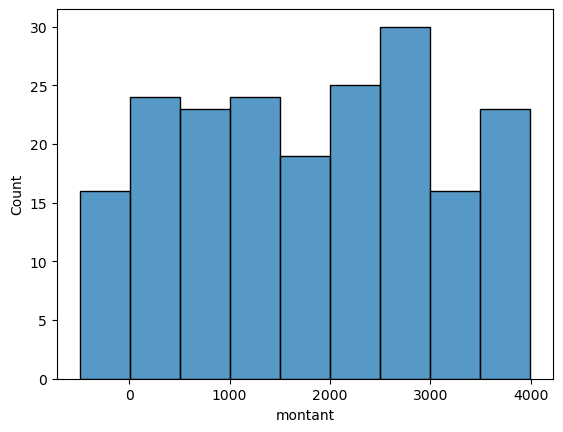

In [106]:
sns.histplot(data=df, x="montant")

<Axes: xlabel='montant'>

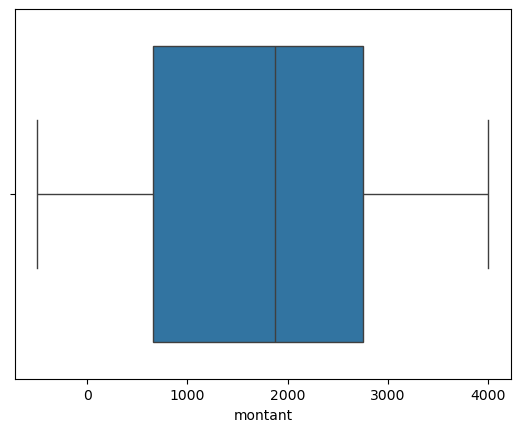

In [107]:
sns.boxplot(data = df , x="montant")

BOXPLOT
HISTOGRAME DE MONTANT
COURBE LINEAR

In [108]:
df.sample(5)["date"]

10     2025-01-11
169    2025-06-19
40     2025-02-10
198    2025-07-18
176    2025-06-26
Name: date, dtype: object

Correction

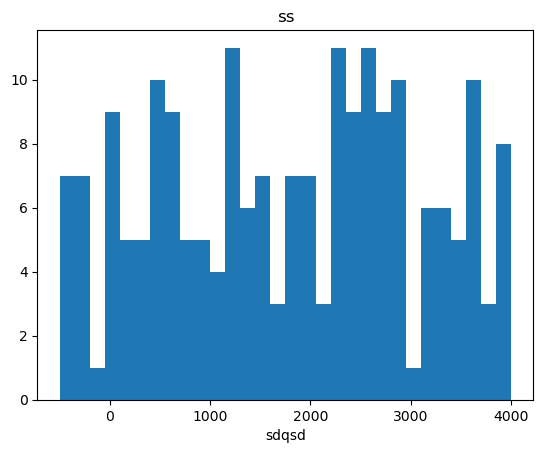

In [109]:
plt.hist(df["montant"],bins=30)
plt.title("ss")
plt.xlabel("sdqsd")
plt.show()

<Axes: xlabel='montant'>

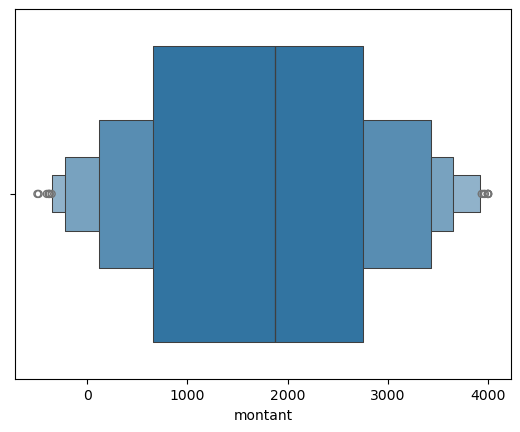

In [110]:
sns.boxenplot(x="montant" , data=df)

<Axes: xlabel='montant'>

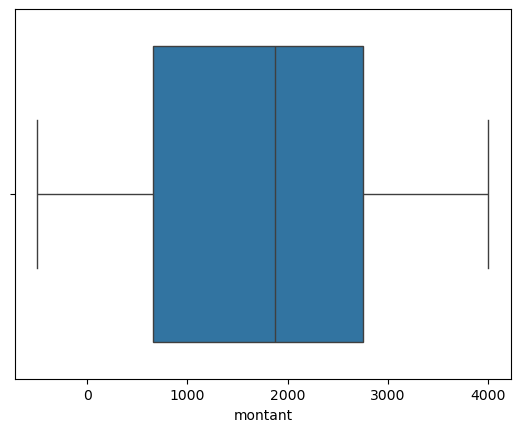

In [111]:
sns.boxplot(x=df["montant"])

<Axes: xlabel='type', ylabel='montant'>

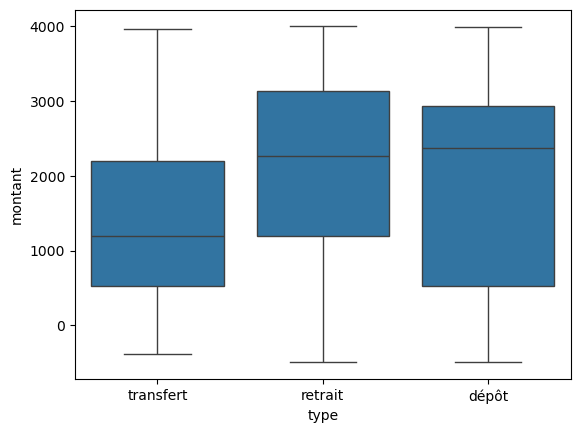

In [112]:
sns.boxplot(x='type' , y='montant' , data= df)

In [113]:
df["date"] = pd.to_datetime(df["date"])

In [114]:
df["moisAnnee"]= df["date"].dt.to_period("M")

<Axes: xlabel='moisAnnee'>

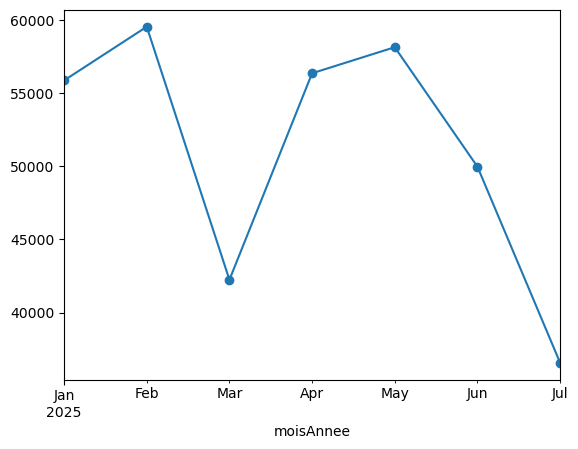

In [115]:
df.groupby("moisAnnee")["montant"].sum().plot(marker="o")

DATA CLEANING

In [116]:
df["statut"].unique()

array(['validé', 'annulé'], dtype=object)

In [117]:
df=df[df["statut"] == "validé"]

In [118]:
df["montant"] = df.groupby('type')["montant"].transform(lambda x : x.fillna(x.mean()))

In [119]:
df["montantA"] = df["montant"].abs()

In [120]:
df["Annee"] = df["date"].dt.year

In [121]:
df["Mois"] = df["date"].dt.month

In [122]:
df["region"] = df["region"].str.upper()

In [123]:
df_1000 = df[df["montantA"]>1000]

In [124]:
df["type"].sample(3)

22        dépôt
42    transfert
10    transfert
Name: type, dtype: object

20

In [125]:
df["est_depot"] = df["type"].apply(lambda x: 1 if x == "dépôt" else 0)

21

In [126]:
Q1 = df["montant"].quantile(0.25)
Q3 = df["montant"].quantile(0.75)
IQR = Q3 - Q1
df["outlier"] = ((df["montant"] < (Q1 - 1.5 * IQR)) | (df["montant"] > (Q3 + 1.5 * IQR))).astype(int)
df.loc[df["outlier"] == 1, "montant"] = df["montant"].median()

In [127]:
df["mode_paiement"].info()

<class 'pandas.core.series.Series'>
Index: 179 entries, 0 to 199
Series name: mode_paiement
Non-Null Count  Dtype 
--------------  ----- 
179 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


In [128]:
df['mode_paiement'] = df['mode_paiement'].astype('category') 

In [129]:
df["mode_paiement"].info()

<class 'pandas.core.series.Series'>
Index: 179 entries, 0 to 199
Series name: mode_paiement
Non-Null Count  Dtype   
--------------  -----   
179 non-null    category
dtypes: category(1)
memory usage: 1.8 KB


In [130]:
pivot1 = df.pivot_table(index='region', columns='type', values='montant', aggfunc='sum')

In [133]:
pivot2 = df.pivot_table(values='transaction_id' , index="moisAnnee",columns='type' , aggfunc='count')

In [138]:
with pd.ExcelWriter("PivotTables.xlsx") as writer :
    pivot1.to_excel(writer,sheet_name='MtRgType')
    pivot2.to_excel(writer,sheet_name='TrMoType')

ModuleNotFoundError: No module named 'openpyxl'